In [1]:
!pip install opencv-python

In [2]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/group.jpg

--2026-02-20 15:12:59--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91814 (90K) [image/jpeg]
Saving to: ‘lena.jpg’

lena.jpg            100%[===================>]  89.66K  --.-KB/s    in 0.02s   

2026-02-20 15:13:00 (5.42 MB/s) - ‘lena.jpg’ saved [91814/91814]

--2026-02-20 15:13:00--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/group.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2026-02-20 15:13:00 ERROR 404: Not Found.

In [3]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2026-02-20 15:13:03--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2026-02-20 15:13:03 (16.7 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



Number of faces detected: 1


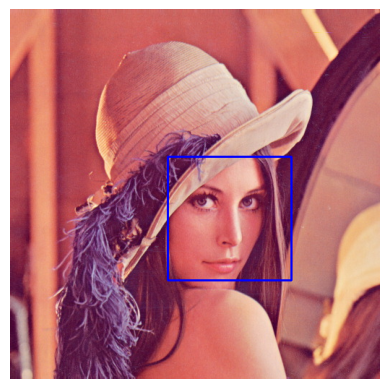

In [5]:
import cv2
import matplotlib.pyplot as plt

# Load Haar cascade
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# Load image
img = cv2.imread("lena.jpg") # Changed from "group.jpg" to "lena.jpg"

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=5
)

print("Number of faces detected:", len(faces))

# Draw rectangles
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

In [6]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np

def take_photo(filename='photo.jpg'):
    js = Javascript('''
        async function takePhoto() {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();
            return canvas.toDataURL('image/jpeg');
        }
    ''')
    display(js)
    data = eval_js('takePhoto()')
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

<IPython.core.display.Javascript object>

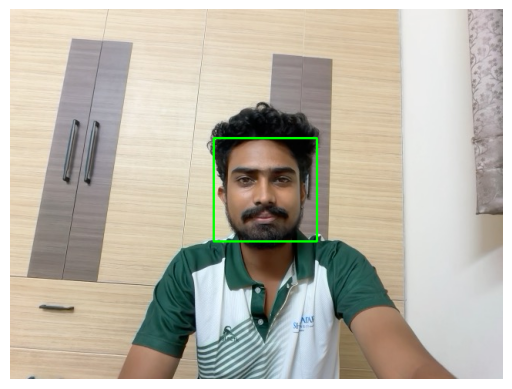

In [10]:
filename = take_photo()

img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

In [11]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml

--2026-02-20 15:20:56--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2026-02-20 15:20:56 (17.0 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]

--2026-02-20 15:20:56--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443.

In [12]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/group.jpg

--2026-02-20 15:21:05--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/group.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2026-02-20 15:21:05 ERROR 404: Not Found.



Faces detected: 1


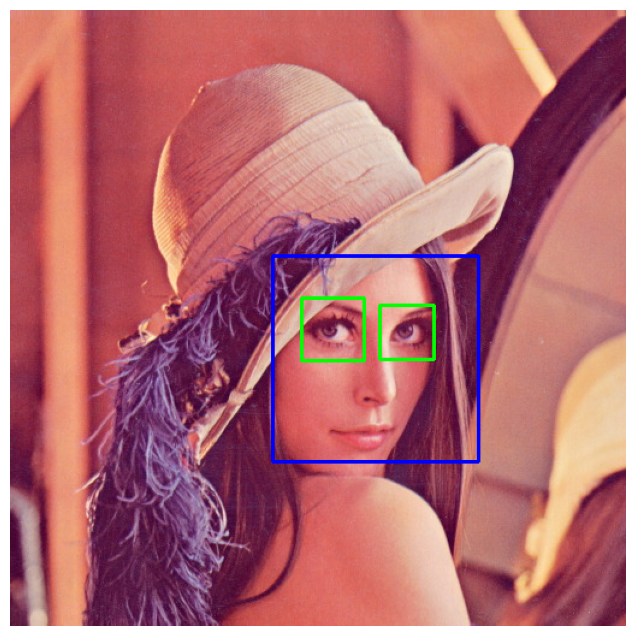

In [14]:
import cv2
import matplotlib.pyplot as plt

# Load cascades
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")
smile_cascade = cv2.CascadeClassifier("haarcascade_smile.xml")

# Load image
img = cv2.imread("lena.jpg") # Changed from "group.jpg" to "lena.jpg"
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

print("Faces detected:", len(faces))

for (x, y, w, h) in faces:

    # Draw face rectangle (Blue)
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Region of Interest (ROI)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # Detect eyes inside face
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10)

    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

    # Detect smile inside face
    smiles = smile_cascade.detectMultiScale(
        roi_gray,
        scaleFactor=1.8,
        minNeighbors=20
    )

    for (sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 2)

# Convert for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

<IPython.core.display.Javascript object>

Faces detected: 1


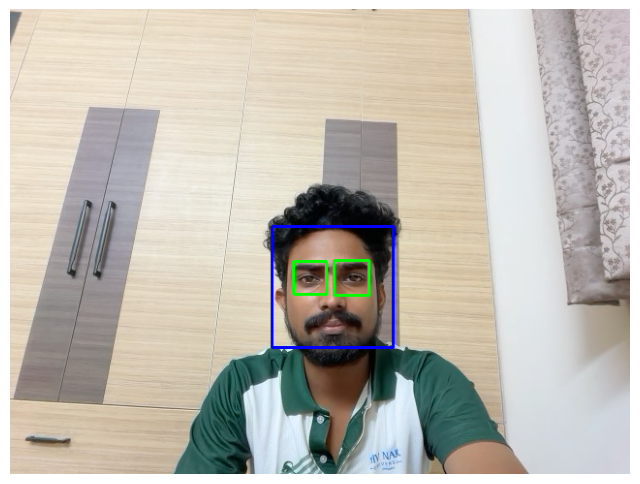

In [16]:
filename = take_photo()

img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

print("Faces detected:", len(faces))

for (x, y, w, h) in faces:

    # Draw Face (Blue)
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Region of Interest
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # Detect Eyes
    eyes = eye_cascade.detectMultiScale(
        roi_gray,
        scaleFactor=1.1,
        minNeighbors=10
    )

    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

    # Detect Smile
    smiles = smile_cascade.detectMultiScale(
        roi_gray,
        scaleFactor=1.8,
        minNeighbors=20
    )

    for (sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 2)

# Convert for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()